In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import yfinance as yfin
yfin.pdr_override()
plt.style.use('fivethirtyeight')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


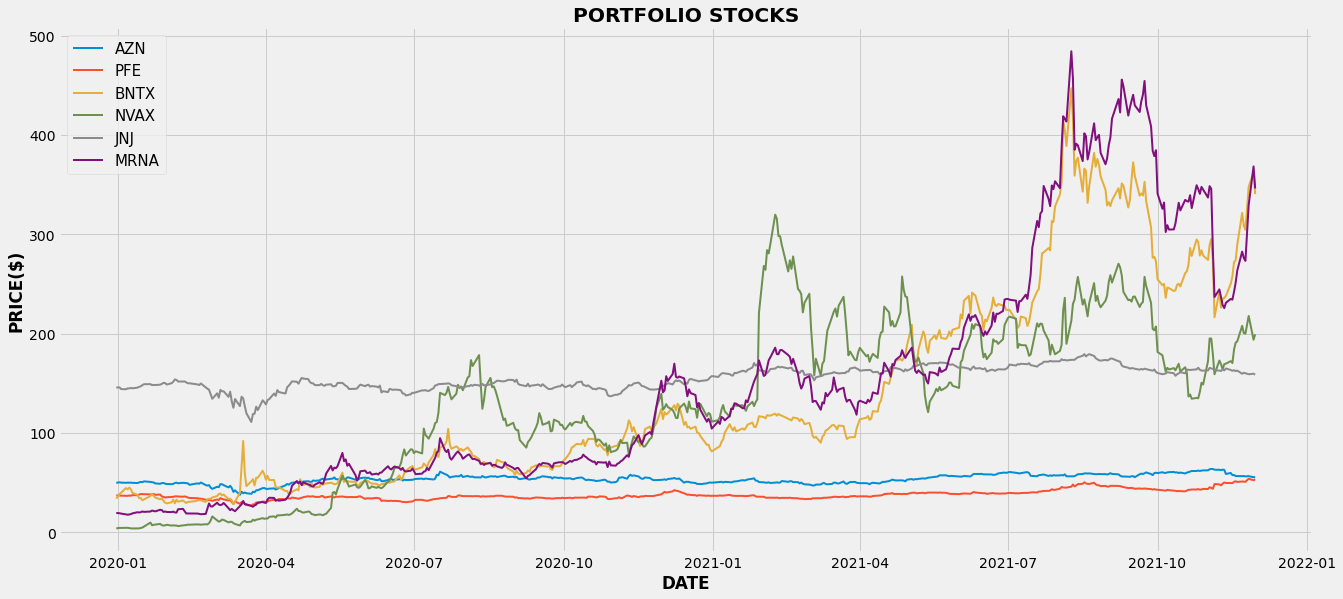

In [3]:
end = dt.datetime.now()
start = end - dt.timedelta(days=500)

assets = ['AZN','PFE','BNTX','NVAX','JNJ','MRNA']
dataframe = pd.DataFrame()

for stock in assets:
    dataframe[stock] = web.get_data_yahoo(stock, start='2020-01-01', end=end)['Close']
    
dataframe

plt.figure(figsize=(20,9))


for t in dataframe.columns.values:
    plt.plot(dataframe[t], label = t, lw=2)
    plt.title('PORTFOLIO STOCKS', fontweight='bold')

plt.xlabel('DATE', fontweight='bold')
plt.ylabel('PRICE($)', fontweight='bold')
plt.legend(fontsize=15, loc="upper left")
plt.show()

returns = np.log(dataframe / dataframe.shift(1))
kov_matrix = returns.cov()*252

[*********************100%***********************]  1 of 1 completed


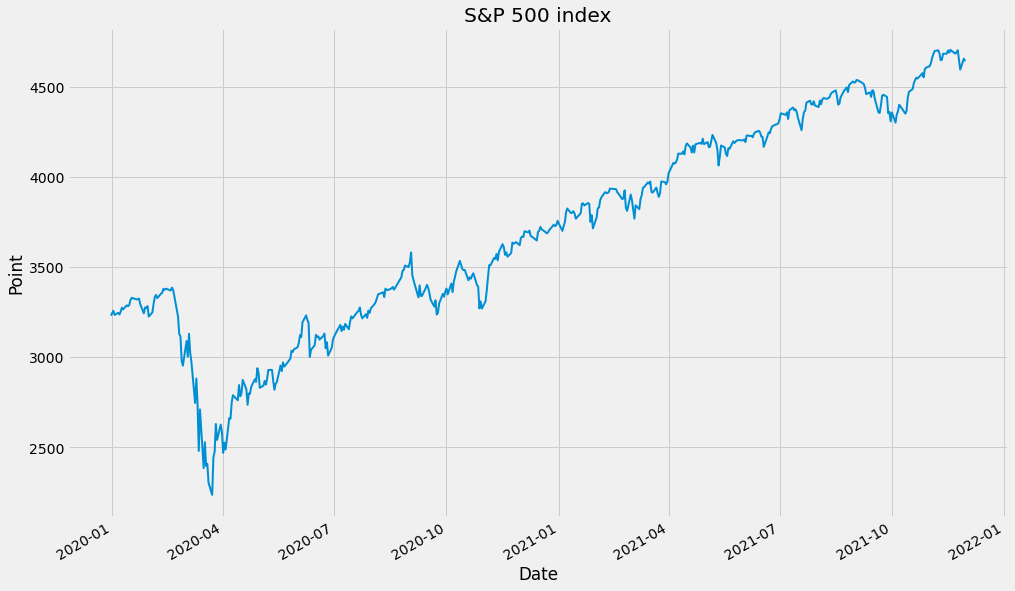

In [4]:
gspc_end = dt.datetime.now()
gspc_start = end-dt.timedelta(days=6000)
gspc = web.get_data_yahoo('^GSPC', start='2020-01-01', end=gspc_end)['Close']

plt.figure(figsize=(15,10))
gspc.plot(lw=2)
plt.title('S&P 500 index')
plt.xlabel('Date')
plt.ylabel('Point')
plt.show()

In [5]:

azn_ret = returns['AZN'].mean()*100*252
azn_vol = np.sqrt(kov_matrix.loc['AZN','AZN'])*100
print('AZN ret: ', round(azn_ret,3),'%')
print('AZN vol: ', round(azn_vol,3),'%')

print('-------------------------------')

pfe_ret = returns['PFE'].mean()*100*252
pfe_vol = np.sqrt(kov_matrix.loc['PFE','PFE'])*100
print('PFE ret: ', round(pfe_ret,3),'%')
print('PFE vol: ', round(pfe_vol,3),'%')

print('-------------------------------')

bntx_ret = returns['BNTX'].mean()*100*252
bntx_vol = np.sqrt(kov_matrix.loc['BNTX','BNTX'])*100
print('BNTX ret: ', round(pfe_ret,3),'%')
print('BNTX vol: ', round(pfe_vol,3),'%')

print('-------------------------------')

nvax_ret = returns['NVAX'].mean()*100*252
nvax_vol = np.sqrt(kov_matrix.loc['NVAX','NVAX'])*100
print('NVAX ret: ', round(nvax_ret,3),'%')
print('NVAX vol: ', round(nvax_vol,3),'%')

print('-------------------------------')

jnj_ret = returns['JNJ'].mean()*100*252 
jnj_vol = np.sqrt(kov_matrix.loc['JNJ','JNJ'])*100
print('JNJ ret: ', round(jnj_ret,3),'%')
print('JNJ vol: ', round(jnj_vol,3),'%')

print('-------------------------------')

mrna_ret = returns['MRNA'].mean()*100*252 
mrna_vol = np.sqrt(kov_matrix.loc['MRNA','MRNA'])*100
print('MRNA ret: ', round(mrna_ret,3),'%')
print('MRNA vol: ', round(mrna_vol,3),'%')

AZN ret:  5.798 %
AZN vol:  30.505 %
-------------------------------
PFE ret:  18.948 %
PFE vol:  30.743 %
-------------------------------
BNTX ret:  18.948 %
BNTX vol:  30.743 %
-------------------------------
NVAX ret:  204.236 %
NVAX vol:  135.919 %
-------------------------------
JNJ ret:  4.411 %
JNJ vol:  23.979 %
-------------------------------
MRNA ret:  149.935 %
MRNA vol:  90.215 %


In [6]:
#100 nap
end = dt.datetime.now()
start_100 = end - dt.timedelta(days=100)
SPY_100 = web.get_data_yahoo('SPY', start=start_100, end=end)['Close']
rets_100 = SPY_100.pct_change()
SPY_ret_100 = (rets_100.mean()*100)*252
SPY_vol_100 = np.sqrt(rets_100.var()*252)*100
print("SPY (100 day) ret: ",round(SPY_ret_100,3),'%')
print("SPY (100 day) vol: ",round(SPY_vol_100,3),'%')
print(start_100)

[*********************100%***********************]  1 of 1 completed
SPY (100 day) ret:  13.571 %
SPY (100 day) vol:  11.69 %
2021-08-22 16:16:27.202710


In [7]:
#250 nap
start_250 = end - dt.timedelta(days=250)
SPY_250 = web.get_data_yahoo('SPY', start=start_250, end=end)['Close']
rets_250 = SPY_250.pct_change()
SPY_ret_250 = (rets_250.mean()*100)*252
SPY_vol_250 = np.sqrt(rets_250.var()*252)*100
print(start_250)
print("SPY (250 day) ret: ",round(SPY_ret_250,3),'%')
print("SPY (250 day) vol: ",round(SPY_vol_250,3),'%')

[*********************100%***********************]  1 of 1 completed
2021-03-25 16:16:27.202710
SPY (250 day) ret:  25.843 %
SPY (250 day) vol:  11.197 %


In [8]:
#500 nap
start_500 = end - dt.timedelta(days=500)
SPY_500 = web.get_data_yahoo('SPY', start=start_500, end=end)['Close']
rets_500 = SPY_500.pct_change()
SPY_ret_500 = (rets_500.mean()*100)*252
SPY_vol_500 = np.sqrt(rets_500.var()*252)*100
print(start_500)
print("SPY (500 day) ret: ",round(SPY_ret_500,3),'%')
print("SPY (500 day) vol: ",round(SPY_vol_500,3),'%')

[*********************100%***********************]  1 of 1 completed
2020-07-18 16:16:27.202710
SPY (500 day) ret:  27.052 %
SPY (500 day) vol:  14.055 %


In [9]:
# 1000 nap
start_1000 = end - dt.timedelta(days=1000)
SPY_1000 = web.get_data_yahoo('SPY', start=start_1000, end=end)['Close']
rets_1000 = SPY_1000.pct_change()
SPY_ret_1000 = (rets_1000.mean()*100)*252
SPY_vol_1000 = np.sqrt(rets_1000.var()*252)*100
print("SPY (1000 day) ret: ",round(SPY_ret_1000,3),'%')
print("SPY (1000 day) vol: ",round(SPY_vol_1000,3),'%')

[*********************100%***********************]  1 of 1 completed
SPY (1000 day) ret:  21.268 %
SPY (1000 day) vol:  22.516 %


In [10]:
#2000 nap
start_2000 = end - dt.timedelta(days=2000)
SPY_2000 = web.get_data_yahoo('SPY', start=start_2000, end=end)['Close']
rets_2000 = SPY_2000.pct_change()
SPY_ret_2000 = (rets_2000.mean()*100)*252
SPY_vol_2000 = np.sqrt(rets_2000.var()*252)*100
print("SPY (2000 day) ret: ",round(SPY_ret_2000,3),'%')
print("SPY (2000 day) vol: ",round(SPY_vol_2000,3),'%')

[*********************100%***********************]  1 of 1 completed
SPY (2000 day) ret:  15.967 %
SPY (2000 day) vol:  18.308 %


In [10]:
#3000 nap
start_3000 = end - dt.timedelta(days=3000)
SPY_3000 = web.get_data_yahoo('SPY', start=start_3000, end=end)['Close']
rets_3000 = SPY_3000.pct_change()
SPY_ret_3000 = (rets_3000.mean()*100)*252
SPY_vol_3000 = np.sqrt(rets_3000.var()*252)*100
print("SPY (3000 day) ret: ",round(SPY_ret_3000,3),'%')
print("SPY (3000 day) vol: ",round(SPY_vol_3000,3),'%')

[*********************100%***********************]  1 of 1 completed
SPY (3000 day) ret:  14.189 %
SPY (3000 day) vol:  16.851 %


In [11]:
#4000 nap
start_4000 = end - dt.timedelta(days=4000)
SPY_4000 = web.get_data_yahoo('SPY', start=start_4000, end=end)['Close']
rets_4000 = SPY_4000.pct_change()
SPY_ret_4000 = (rets_4000.mean()*100)*252
SPY_vol_4000 = np.sqrt(rets_4000.var()*252)*100
print("SPY (4000 day) ret: ",round(SPY_ret_4000,3),'%')
print("SPY (4000 day) vol: ",round(SPY_vol_4000,3),'%')

[*********************100%***********************]  1 of 1 completed
SPY (4000 day) ret:  13.672 %
SPY (4000 day) vol:  16.866 %


In [12]:
#5000 nap
start_5000 = end - dt.timedelta(days=5000)
SPY_5000 = web.get_data_yahoo('SPY', start=start_5000, end=end)['Close']
rets_5000 = SPY_5000.pct_change()
SPY_ret_5000 = (rets_5000.mean()*100)*252
SPY_vol_5000 = np.sqrt(rets_5000.var()*252)*100
print("SPY (5000 day) ret: ",round(SPY_ret_5000,3),'%')
print("SPY (5000 day) vol: ",round(SPY_vol_5000,3),'%')

[*********************100%***********************]  1 of 1 completed
SPY (5000 day) ret:  11.594 %
SPY (5000 day) vol:  20.549 %


In [13]:
#6000 nap
start_6000 = end - dt.timedelta(days=6000)
SPY_6000 = web.get_data_yahoo('SPY', start=start_6000, end=end)['Close']
rets_6000 = SPY_6000.pct_change()
SPY_ret_6000 = (rets_6000.mean()*100)*252
SPY_vol_6000 = np.sqrt(rets_6000.var()*252)*100
print("SPY (6000 day) ret: ",round(SPY_ret_6000,3),'%')
print("SPY (6000 day) vol: ",round(SPY_vol_6000,3),'%')

[*********************100%***********************]  1 of 1 completed
SPY (6000 day) ret:  10.162 %
SPY (6000 day) vol:  19.525 %


In [14]:
#2 random idopont
SPY_rand = web.get_data_yahoo('SPY', start='2015-02-01', end='2017-02-05')['Close']
rets_rand = SPY_rand.pct_change()
SPY_ret_rand = (rets_rand.mean()*100)*252
SPY_vol_rand = np.sqrt(rets_rand.var()*252)*100
print("SPY (random 100 day) ret: ",round(SPY_ret_rand,3),'%')
print("SPY (random 100 day) vol: ",round(SPY_vol_rand,3),'%')

[*********************100%***********************]  1 of 1 completed
SPY (random 100 day) ret:  7.326 %
SPY (random 100 day) vol:  14.022 %


# Bitcoin, Dogecoin

[*********************100%***********************]  1 of 1 completed


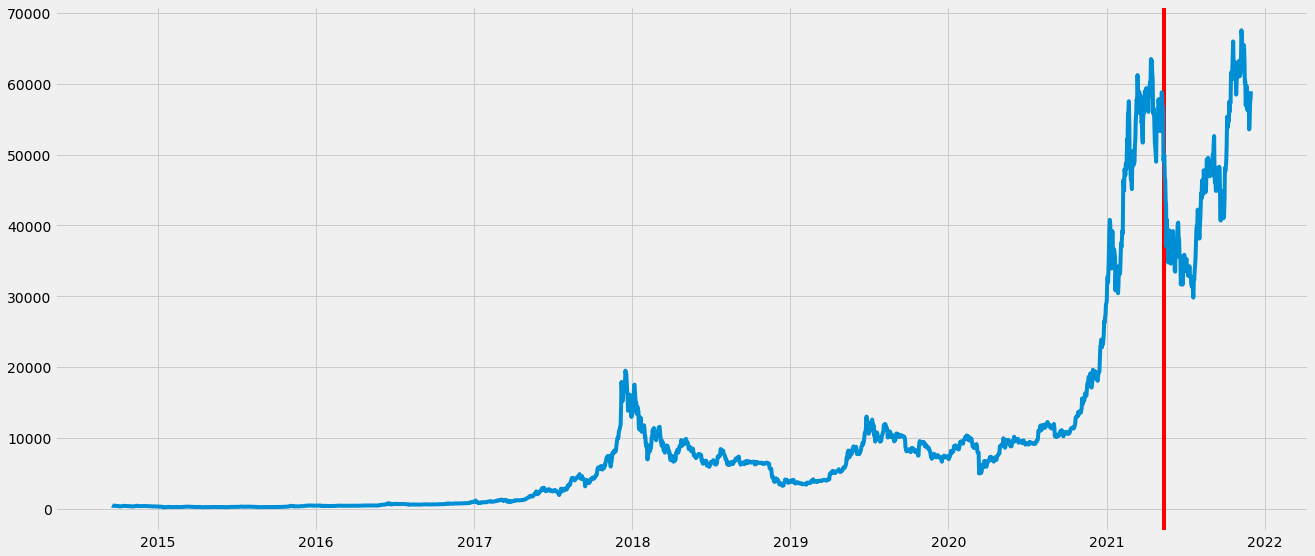

In [11]:
plt.figure(figsize=(20,9))
btc = web.get_data_yahoo('BTC-USD')
plt.axvline(dt.datetime(2021,5,13), c='r')
plt.plot(btc['Close'])
plt.show()

[*********************100%***********************]  1 of 1 completed


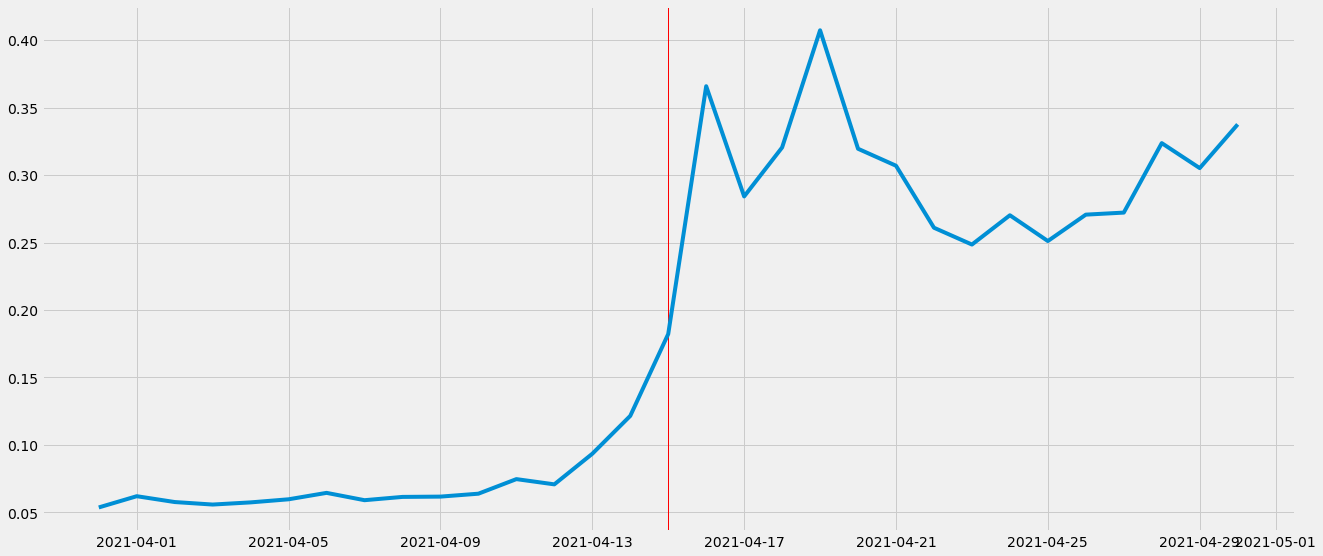

In [12]:
plt.figure(figsize=(20,9))

doge = web.get_data_yahoo('DOGE-USD', start='2021-04-01', end='2021-05-01')["Close"]
plt.axvline(dt.datetime(2021,4,15), c='r', lw=1)
plt.plot(doge)
plt.show()

[*********************100%***********************]  1 of 1 completed


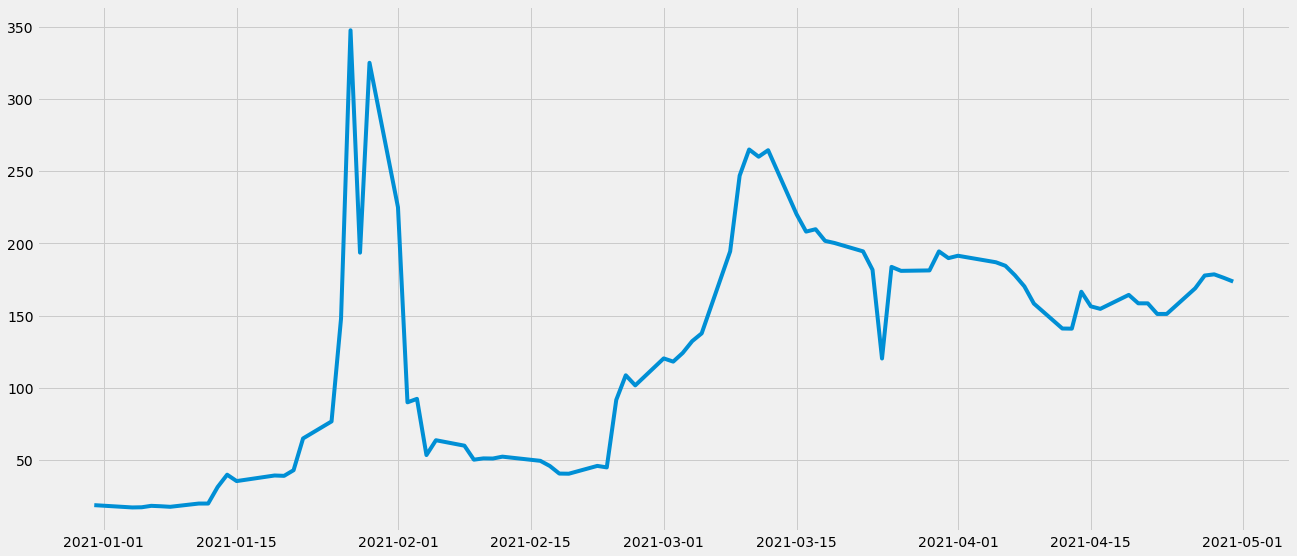

In [13]:
plt.figure(figsize=(20,9))
gme = web.get_data_yahoo('GME', start='2021-01-01', end='2021-05-01')["Close"]
plt.plot(gme)
plt.show()